In [ ]:
from plotnine import *
import pandas as pd

In [ ]:
time = "2024-01-24_20:40"
time = "2024-01-30_14:24"
# time = "2024-01-30_15:31" # classifier
time = "2024-01-31_11:30" # classifier_reg
# time = "2024-02-04_19:53" # classifier_reg
# time = "2024-02-04_22:36" # classifier_reg
# time = "2024-02-05_12:00" # reg
# time = "2024-02-05_22:08" # reg
# time = "2024-02-06_11:56" # classifier_reg
time = "2024-02-06_14:07" # classifier_reg
# time = "2024-02-06_14:55" # classifier_reg
time = "2024-02-06_15:45" # classifier_reg
# time = "2024-02-06_21:47" # reg
# time = "2024-02-09_12:57" # classifier_reg

df = pd.read_csv(f"/projects/genomic-ml/da2343/ml_project_1/reproduce/results/{time}_results.csv")
# df has columns: ['Mean Squared Error', 'FoldID', 'Dataset', 'Index of Predicted Column', 'Predicted Column Name', 'Algorithm']
# drop Index of Predicted Column
df = df.drop(columns=['Index of Predicted Column'])

# group df by dataset, algorithm, and predicted column name
# find mean of mean squared error
df = df.groupby(['Dataset', 'Algorithm', 'Predicted Column Name', 'FoldID']).mean().reset_index()

df['train.groups'] = "all"

df = df.rename(columns={"Mean Squared Error": "regr.mse"})
df = df.rename(columns={"Predicted Column Name": "task_id"})
df = df.rename(columns={"FoldID": "test.fold"})
df = df.rename(columns={"Algorithm": "algorithm"})
df = df.rename(columns={"Dataset": "test.group"})
df

# save to csv
df.to_csv(f"{time}_reg_results_R.csv", index=False)

In [ ]:
df

In [ ]:

from plotnine import *
import pandas as pd

time = "2024-01-24_20:40"
time = "2024-01-30_14:24"
time = "2024-01-30_15:31" # classifier
time = "2024-01-31_11:30" # classifier_reg
time = "2024-02-04_19:53" # classifier_reg
time = "2024-02-04_22:36" # classifier_reg
time = "2024-02-05_10:50" # reg
time = "2024-02-05_12:00" # reg
time = "2024-02-05_22:08" # reg
time = "2024-02-06_11:56" # classifier_reg
time = "2024-02-06_14:07" # classifier_reg
# time = "2024-02-06_14:55" # classifier_reg
# time = "2024-02-06_15:08" # classifier_reg
time = "2024-02-06_15:45" # classifier_reg


df = pd.read_csv(f"/projects/genomic-ml/da2343/ml_project_1/reproduce/results/{time}_results.csv")
df = df.drop(columns=['Index of Predicted Column'])
df = df.rename(columns={'Predicted Column Name': 'Column_Name'})
df = df.groupby(['Dataset', 'Algorithm', 'Column_Name', 'FoldID']).mean().reset_index()

df1 = df[(df['Column_Name'] == "X108747") | (df['Column_Name'] == "X119010") | (df['Column_Name'] == "X127309") | (df['Column_Name'] == "X181892") | (df['Column_Name'] == "X185451") | (df['Column_Name'] == "X198941")  ]
df2 = df[(df['Column_Name'] == "f__Bacteroidaceae") | (df['Column_Name'] == "f__Enterobacteriaceae") | (df['Column_Name'] == "f__Lachnospiraceae") | (df['Column_Name'] == "f__Pasteurellaceae") | (df['Column_Name'] == "f__Ruminococcaceae") ]

df3 = df[(df['Column_Name'] == "Abiotrophia") | (df['Column_Name'] == "Actinobaculum") | (df['Column_Name'] == "Actinomyces") | (df['Column_Name'] == "Alloprevotella") | (df['Column_Name'] == "Alistipes") ]


df = pd.concat([df1, df2, df3])

# save
df.to_csv(f"{time}_results_other_reg_R.csv", index=False)

In [ ]:
df = df.groupby(['Algorithm']).mean().reset_index()
df

# REGRESSION

In [ ]:
p = ggplot(df)
p = p + geom_point(aes(x="MSE", y="train.groups", color="Algorithm"))
p = p + facet_grid("Dataset ~ Column_Name", scales="free_x")
p = p + labs(x = "Mean Squared Error", y="FoldID")
p = p + theme(axis_text_x=element_text(angle=90), figure_size=(40, 5))
p = p + scale_x_log10()
print(p)

In [ ]:

df["Algorithm"] = pd.Categorical(df["Algorithm"], categories=["LassoCV", "LogisticRegLassoCV", "Featureless"])

p = ggplot(df)
p = p + geom_point(aes(x="Mean Squared Error", y="factor(FoldID)", color="factor(Algorithm)"))
p = p + facet_wrap("~ Dataset + Column_Name", scales="free_x", labeller='label_both')
p = p + labs(x = "Mean Squared Error", y="FoldID")
p = p + theme( panel_spacing=0.2, figure_size=(15, 10))
p = p + scale_x_log10()
print(p)

In [ ]:
p.save(filename = "plot.png", dpi=3000)


# CLASSIFICATION

In [ ]:
from plotnine import *
import pandas as pd

time = "2024-02-09_11:36" # classifier
df = pd.read_csv(f"/projects/genomic-ml/da2343/ml_project_1/reproduce/results/{time}_results.csv")
df

In [ ]:

df = df.drop(columns=['Index of Predicted Column', 'FPR', 'TPR'])
df = df.groupby(['Dataset', 'Algorithm', 'Predicted Column Name', 'FoldID']).mean().reset_index()

df['train.groups'] = "all"

df = df.rename(columns={"Test Accuracy": "accuracy"})
df = df.rename(columns={"Predicted Column Name": "task_id"})
df = df.rename(columns={"FoldID": "test.fold"})
df = df.rename(columns={"Algorithm": "algorithm"})
df = df.rename(columns={"Dataset": "test.group"})
df
# save to csv
df.to_csv(f"{time}_classification_results_R.csv", index=False)

In [ ]:

p = ggplot(log_df)
p = p + geom_point(aes(x="Test Accuracy", y="Dataset", color="Algorithm"))
p = p + facet_grid("~Predicted Column Name", scales="free")
p = p + labs(x="Accuracy", y="Dataset")
p = p + theme(axis_text_x=element_text(angle=90))
p = p + theme(figure_size=(45, 2))
# p = p + scale_x_log10()
print(p)

# ROC CURVE

In [70]:
from plotnine import *
import pandas as pd
import numpy as np

time = "2024-01-24_20:40"
time = "2024-01-30_14:24"
time = "2024-01-30_15:31" # classifier
time = "2024-01-31_11:30" # classifier_reg
time = "2024-02-02_11:33"
time = "2024-02-09_11:36" # classifier

df = pd.read_csv(f"/projects/genomic-ml/da2343/ml_project_1/reproduce/results/{time}_results.csv")
# df has columns: ['Mean Squared Error', 'FoldID', 'Dataset', 'Index of Predicted Column', 'Predicted Column Name', 'Algorithm']
# drop Index of Predicted Column
df = df.drop(columns=['Index of Predicted Column', 'Test Accuracy'])
df = df.rename(columns={'Predicted Column Name': 'Column_Name'})

# Convert 'FPR' and 'TPR' columns from string to array
df['FPR'] = df['FPR'].apply(lambda x:  np.fromstring(x[1:-1], sep=" "))
df['TPR'] = df['TPR'].apply(lambda x:  np.fromstring(x[1:-1], sep=" "))

# Define a function to check if a list contains a nan
def contains_nan(lst):
    return np.isnan(lst).any()
# Apply the function to 'FPR' and 'TPR' columns and replace the list with np.nan if it contains a nan
df['FPR'] = df['FPR'].apply(lambda x: np.nan if contains_nan(x) else x)
df['TPR'] = df['TPR'].apply(lambda x: np.nan if contains_nan(x) else x)
# Drop the rows with nan values
df = df.dropna()

# def explode_array(df, col):
#     return df[col].apply(pd.Series).stack().reset_index(level=1, drop=True).rename(col)
# df = df.drop(['FPR', 'TPR'], axis=1).join(explode_array(df, 'FPR')).join(explode_array(df, 'TPR'))
# df = df[df['FoldID'] == 0]

df = df.rename(columns={"Test Accuracy": "accuracy"})
df = df.rename(columns={"Column_Name": "task_id"})
df = df.rename(columns={"FoldID": "test.fold"})
df = df.rename(columns={"Algorithm": "algorithm"})
df = df.rename(columns={"Dataset": "test.group"})
df['train.groups'] = "all"
df = df[df['test.fold'] == 0]

# df = df[(df['task_id'] == "Absidia") |  (df['task_id'] == "Mucilaginibacter")]

# def explode_array(df, col):
#     return df[col].apply(pd.Series).stack().reset_index(level=1, drop=True).rename(col)
# df = df.drop(['FPR', 'TPR'], axis=1).join(explode_array(df, 'FPR')).join(explode_array(df, 'TPR'))

# keep all unique combinations of test.group, algorithm, task_id
df = df.drop_duplicates(subset=['test.group', 'algorithm', 'task_id'])

# def explode_array(df, col):
#     return df[col].apply(pd.Series).stack().reset_index(level=1, drop=True).rename(col)
# df = df.drop(['FPR', 'TPR'], axis=1).join(explode_array(df, 'FPR')).join(explode_array(df, 'TPR'))
df = df[(df['task_id'] == "Absidia")]
df
# df.to_csv(f"{time}_results_roc_R.csv", index=False)

,FPR,TPR,test.fold,test.group,task_id,algorithm,train.groups
270,"[0.0, 1.0]","[0.0, 1.0]",0,Melanization=low,Absidia,FeaturelessClassifier,all
271,"[0.0, 0.66666667, 1.0]","[0.0, 0.6, 1.0]",0,Melanization=low,Absidia,LogisticRegressionCV,all
594,"[0.0, 1.0]","[0.0, 1.0]",0,Melanization=high,Absidia,FeaturelessClassifier,all
595,"[0.0, 1.0]","[0.0, 1.0]",0,Melanization=high,Absidia,LogisticRegressionCV,all
648,"[0.0, 1.0]","[0.0, 1.0]",0,Habitat=soil,Absidia,FeaturelessClassifier,all
649,"[0.0, 1.0]","[0.0, 1.0]",0,Habitat=soil,Absidia,LogisticRegressionCV,all
858,"[0.0, 1.0]","[0.0, 1.0]",0,All Samples,Absidia,FeaturelessClassifier,all
859,"[0.0, 1.0]","[0.0, 1.0]",0,All Samples,Absidia,LogisticRegressionCV,all


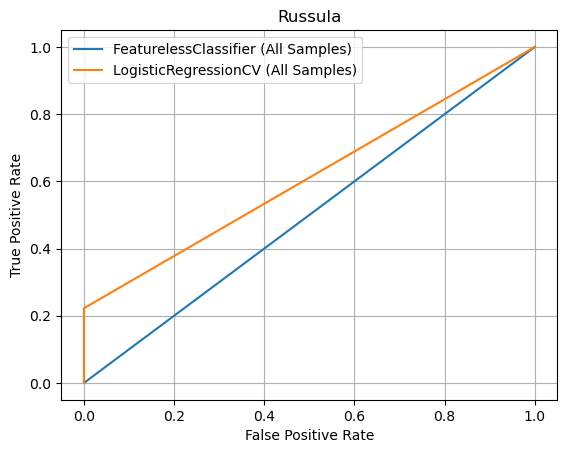

In [77]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

# Sample DataFrame
data = {
    'FPR': [[0., 1.], [0., 0., 1.]],
    'TPR': [[0., 1.], [0., 0.22222222, 1.]],
    'task_id': ['Russula', 'Russula'],
    'test.fold': [0, 0],
    'test.group': ['All Samples', 'All Samples'],
    'algorithm': ['FeaturelessClassifier', 'LogisticRegressionCV'],
    'train.groups': ['all', 'all']
}

# Iterate over each row in the DataFrame
for i, row in enumerate(data['FPR']):
    # Compute ROC curve
    fpr = data['FPR'][i]
    tpr = data['TPR'][i]

    # Plot ROC curve
    plt.plot(fpr, tpr, label=f"{data['algorithm'][i]} ({data['test.group'][i]})")


# Set labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(data['task_id'][i])
plt.legend()
plt.grid(True)
plt.show()

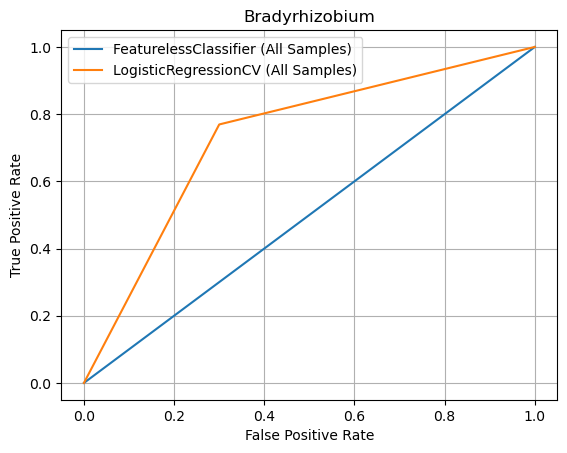

In [78]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

# Sample DataFrame
data = {
    'FPR': [[0., 1.], [0., 0.3, 1.]],
    'TPR': [[0., 1.], [0., 0.76923077, 1.]],
    'task_id': ['Bradyrhizobium', 'Bradyrhizobium'],
    'test.fold': [0, 0],
    'test.group': ['All Samples', 'All Samples'],
    'algorithm': ['FeaturelessClassifier', 'LogisticRegressionCV'],
    'train.groups': ['all', 'all']
}

# Iterate over each row in the DataFrame
for i, row in enumerate(data['FPR']):
    # Compute ROC curve
    fpr = data['FPR'][i]
    tpr = data['TPR'][i]

    # Plot ROC curve
    plt.plot(fpr, tpr, label=f"{data['algorithm'][i]} ({data['test.group'][i]})")


# Set labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(data['task_id'][i])
plt.legend()
plt.grid(True)
plt.show()

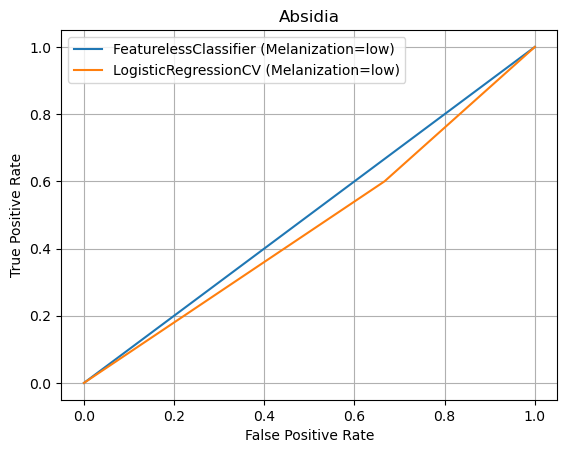

In [79]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

# Sample DataFrame
data = {
    'FPR': [[0., 1.], [0., 0.66666667, 1.]],
    'TPR': [[0., 1.], [0., 0.6, 1.]],
    'task_id': ['Absidia', 'Absidia'],
    'test.fold': [0, 0],
    'test.group': ['Melanization=low', 'Melanization=low'],
    'algorithm': ['FeaturelessClassifier', 'LogisticRegressionCV'],
    'train.groups': ['all', 'all']
}

# Iterate over each row in the DataFrame
for i, row in enumerate(data['FPR']):
    # Compute ROC curve
    fpr = data['FPR'][i]
    tpr = data['TPR'][i]

    # Plot ROC curve
    plt.plot(fpr, tpr, label=f"{data['algorithm'][i]} ({data['test.group'][i]})")

# Set labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(data['task_id'][i])
plt.legend()
plt.grid(True)
plt.show()